<div style='background-color : orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#q3'>Question 3</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color : orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization and dataframing
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud

# Regex
import re

# NLP Prep
import unicodedata
import nltk

# Split
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# .py files
import acquire as a
import prepare as p

# env files
import env

In [2]:
# Set default plt style to 'bmh'
mpl.style.use('bmh')

<div style='background-color : orange'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q1initial'>Initial Setup</a></li>
<li><a href='#q1wordcountcreation'>Word Count Creation</a></li>
<li><a href='#q1bigrams'>Bigrams</a></li>
<li><a href='#q1trigrams'>Trigrams</a></li>
<li><a href='#q1takeaway'>Takeaway</a></li>

<b>Question 1.</b> Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

---

<a id='q1initial'></a>
<h3><b><i>
    Initial Setup
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

In [7]:
# Acquire spam data
query = 'SELECT * FROM  spam'
url = env.get_db_url('spam_db')
spam = pd.read_sql(query, url)
spam.sample()

id label                                               text
2839  2839   ham  BABE !!! I miiiiiiissssssssss you ! I need you...

In [8]:
# Create a cleaned text column as 'text_cleaned'
spam['text_cleaned'] = p.full_clean(spam.text)
spam.sample()

id label                                               text  \
3445  3445   ham  Mon okie lor... Haha, best is cheap n gd food ...   

                                           text_cleaned  
3445  mon okie lor haha best cheap n gd food la ex o...

In [9]:
# Split data into train, val, test
train_validate, test = train_test_split(spam,
                                       random_state=1349,
                                       train_size=0.9,
                                       stratify=spam.label)
train, validate = train_test_split(train_validate,
                                  random_state=1349,
                                  train_size=0.778,
                                  stratify=train_validate.label)
train.shape, validate.shape, test.shape

((3900, 4), (1114, 4), (558, 4))

---

<a id='q1wordcountcreation'></a>
<h3><b><i>
    Word Count Creation
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

In [10]:
# Split into data into word groups
ham_words = ' '.join(train[train.label == 'ham']['text_cleaned'])
spam_words = ' '.join(train[train.label == 'spam']['text_cleaned'])
all_words = ' '.join(train.text_cleaned)
len(ham_words), len(spam_words), len(all_words)

(157636, 55850, 213487)

In [11]:
# Create frequencies for each word group
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [16]:
# Create dataframe with all word frequencies
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))
word_counts.sample()

all  ham  spam
westlife    2    0     2

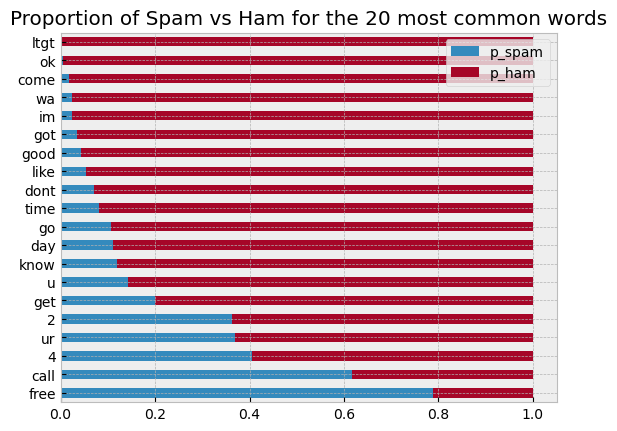

In [29]:
# Visualize word percentage of spam vs. ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')
plt.show()

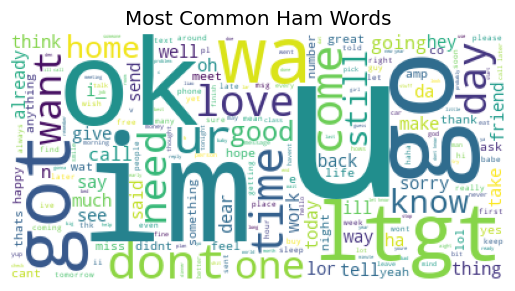

In [34]:
# Wordcloud (Expects a single string of words) of ham unigram
unigram_ham_img = WordCloud(background_color='White').generate(' '.join(ham_words.split()))
plt.imshow(unigram_ham_img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

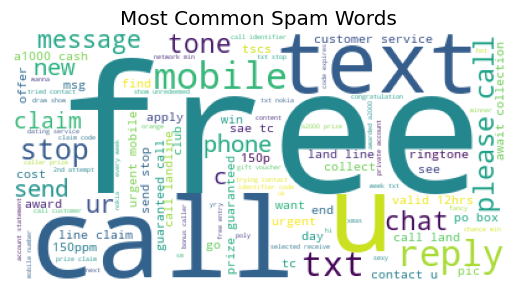

In [35]:
# Wordcloud (Expects a single string of words) of spam unigram
unigram_spam_img = WordCloud(background_color='White').generate(' '.join(spam_words.split()))
plt.imshow(unigram_spam_img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

---

<a id='q1bigrams'></a>
<h3><b><i>
    Bigrams
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

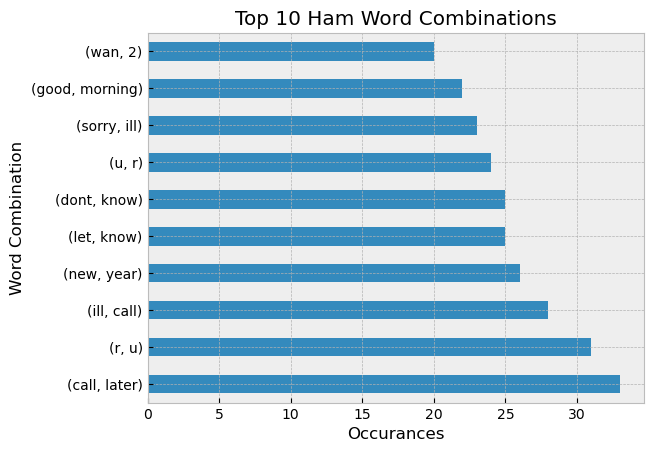

In [39]:
# Check combinations of ham_words
ham_bigram_words = pd.Series(nltk.bigrams(ham_words.split()))
ham_bigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 Ham Word Combinations')
plt.xlabel('Occurances')
plt.ylabel('Word Combination')
plt.show()

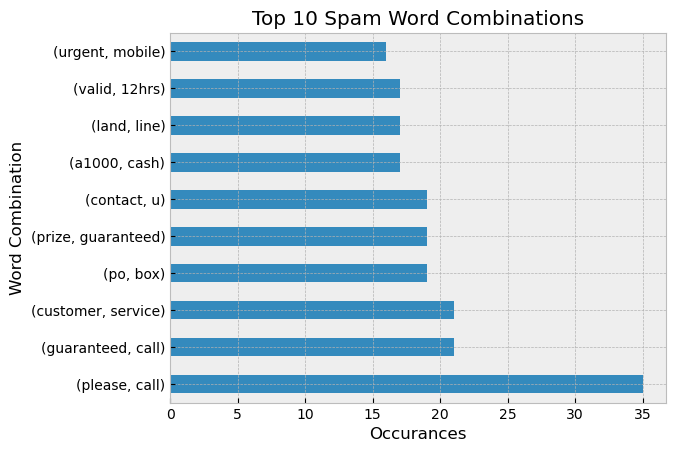

In [40]:
# Check combinations of spam_words
spam_bigram_words = pd.Series(nltk.bigrams(spam_words.split()))
spam_bigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 Spam Word Combinations')
plt.xlabel('Occurances')
plt.ylabel('Word Combination')
plt.show()

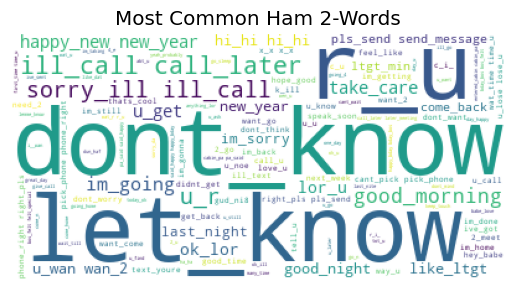

In [49]:
# Wordcloud (Expects a single string of words) of ham bigram
ham_bigram_words_combined = [bigram[0] + '_' + bigram[1] for bigram in ham_bigram_words]
bigram_ham_img = WordCloud(background_color='White').generate(' '.join(ham_bigram_words_combined))
plt.imshow(bigram_ham_img)
plt.axis('off')
plt.title('Most Common Ham 2-Words')
plt.show()

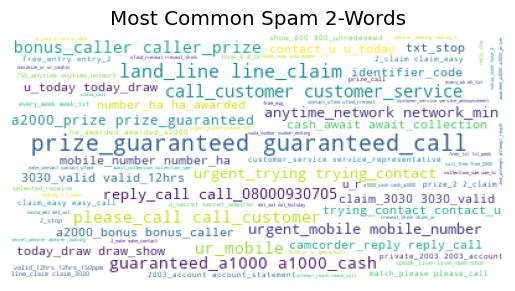

In [51]:
# Wordcloud (Expects a single string of words) of spam bigram
spam_bigram_words_combined = [bigram[0] + '_' + bigram[1] for bigram in spam_bigram_words]
bigram_ham_img = WordCloud(background_color='White').generate(' '.join(spam_bigram_words_combined))
plt.imshow(bigram_ham_img)
plt.axis('off')
plt.title('Most Common Spam 2-Words')
plt.show()

---

<a id='q1trigrams'></a>
<h3><b><i>
    Trigrams
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

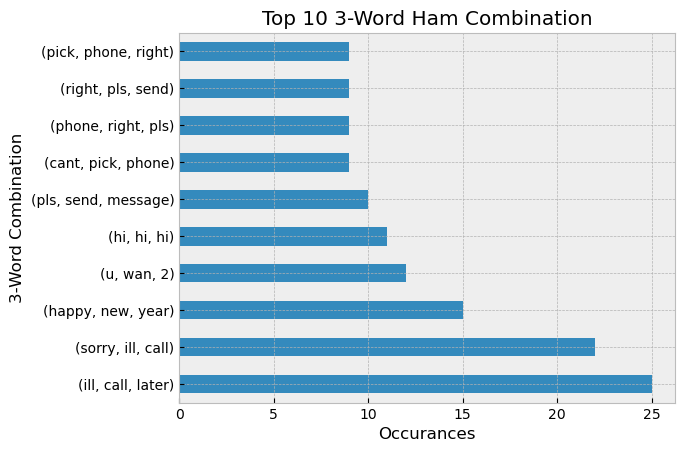

In [56]:
# Visualize distribution of trigrams of ham
ham_trigram_words = pd.Series(nltk.ngrams(ham_words.split(), 3))
ham_trigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 3-Word Ham Combination')
plt.xlabel('Occurances')
plt.ylabel('3-Word Combination')
plt.show()

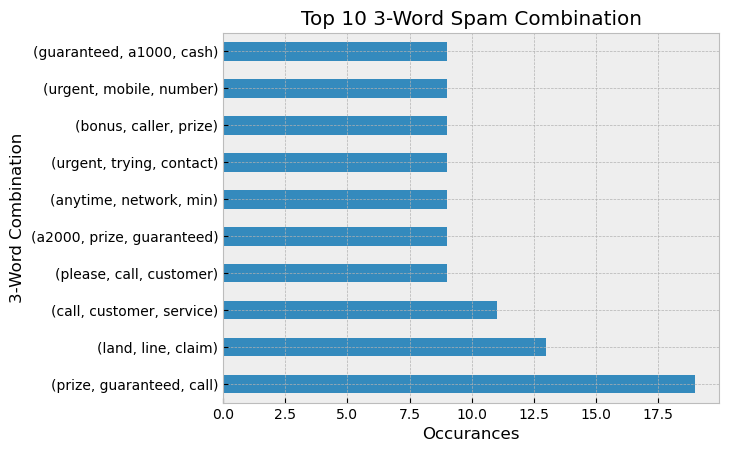

In [57]:
# Visualize distribution of trigrams of spam
spam_trigram_words = pd.Series(nltk.ngrams(spam_words.split(), 3))
spam_trigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 3-Word Spam Combination')
plt.xlabel('Occurances')
plt.ylabel('3-Word Combination')
plt.show()

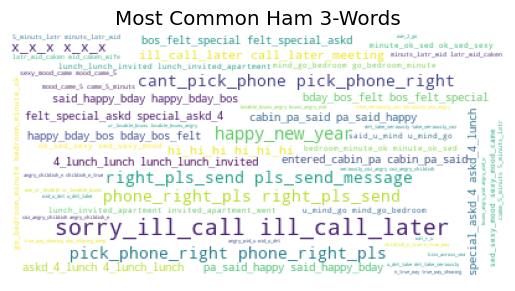

In [59]:
# Wordcloud (Expects a single string of words) of ham trigram
ham_trigram_words_combined = [trigram[0] + '_' + trigram[1] + '_' + trigram[2] for trigram in ham_trigram_words]
trigram_ham_img = WordCloud(background_color='White').generate(' '.join(ham_trigram_words_combined))
plt.imshow(trigram_ham_img)
plt.axis('off')
plt.title('Most Common Ham 3-Words')
plt.show()

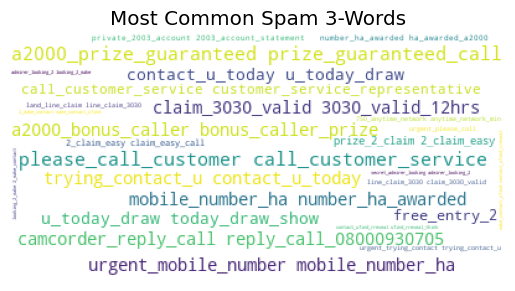

In [61]:
# Wordcloud (Expects a single string of words) of spam trigram
spam_trigram_words_combined = [trigram[0] + '_' + trigram[1] + '_' + trigram[2] for trigram in spam_trigram_words]
trigram_spam_img = WordCloud(background_color='White').generate(' '.join(spam_trigram_words_combined))
plt.imshow(trigram_spam_img)
plt.axis('off')
plt.title('Most Common Spam 3-Words')
plt.show()

---

<a id='q1takeaway'></a>
<h3><b><i>
    Takeaway
</i></b></h3>
<li><a href='#q1'>Question 1 Top</a></li>

- ham tends to have more neutrality or normal conversative words and combinations of words
- spam tends to have a sense of time sensitivity, urgency, or winning something

In [ ]:
# Sentiment analysis
nltk.sentiment.SentimentAnalyzer

<div style='background-color : orange'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 2
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q2initial'>Initial Setup</a></li>
<li><a href='#q2wordcountcreation'>Word Count Creation</a></li>
<li><a href='#q2bigrams'>Bigrams</a></li>
<li><a href='#q2trigrams'>Trigrams</a></li>
<li><a href='#q2takeaway'>Takeaway</a></li>

<b>Question 2.</b> Explore the blog articles using the techniques discussed in the exploration lesson.

---

<a id='q2initial'></a>
<h3><b><i>
    Initial Setup
</i></b></h3>
<li><a href='#q2'>Question 2 Top</a></li>

In [62]:
# Obtain blog article dataframe
codeup_df = p.prepare_blog_articles()

In [66]:
# Join the content columns together into one column
codeup_df['all_content'] = (codeup_df.article_orientation +
 codeup_df.article_first_paragraph +
 codeup_df.article_second_paragraph +
 codeup_df.article_third_paragraph)
codeup_df.sample()

article_title  \
3  Women in Tech: Panelist Spotlight – Madeleine ...   

                                         article_url  \
3  https://codeup.com/events/women-in-tech-madele...   

                                 article_orientation  \
3  codeup hosting woman tech panel honor woman hi...   

                             article_first_paragraph  \
3  madeleine attended codeup student early 2019 p...   

                            article_second_paragraph article_third_paragraph  \
3  dont forget tune march 29th sit insightful con...                    none   

                                         all_content  
3  codeup hosting woman tech panel honor woman hi...

In [67]:
# Split data into train, val, test
train_validate, test = train_test_split(codeup_df,
                                       random_state=1349,
                                       train_size=0.9,)
train, validate = train_test_split(train_validate,
                                  random_state=1349,
                                  train_size=0.778,)
train.shape, validate.shape, test.shape

((3, 7), (2, 7), (1, 7))

---

<a id='q2wordcountcreation'></a>
<h3><b><i>
    Word Count Creation
</i></b></h3>
<li><a href='#q2'>Question 2 Top</a></li>

In [69]:
# Create word group
all_words = ' '.join(codeup_df.all_content)
len(all_words)

4423

In [74]:
# Create word frequencies
all_word_freq = pd.Series(all_words.split()).value_counts()
all_word_freq.head(1)

codeup    21
dtype: int64

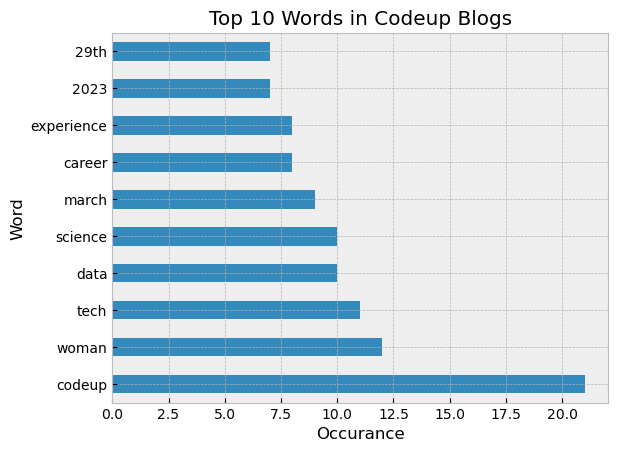

In [77]:
# Visualize distribution of the top 10 words
all_word_freq.head(10).plot.barh()
plt.title('Top 10 Words in Codeup Blogs')
plt.xlabel('Occurance')
plt.ylabel('Word')
plt.show()

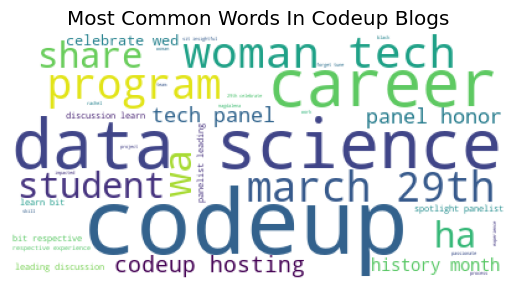

In [85]:
# Visualize wordcloud for single words
unigram_codeup_img = WordCloud(background_color='White').generate(' '.join(all_words.split()))
plt.imshow(unigram_codeup_img)
plt.axis('off')
plt.title('Most Common Words In Codeup Blogs')
plt.show()

---

<a id='q2bigrams'></a>
<h3><b><i>
    Bigrams
</i></b></h3>
<li><a href='#q2'>Question 2 Top</a></li>

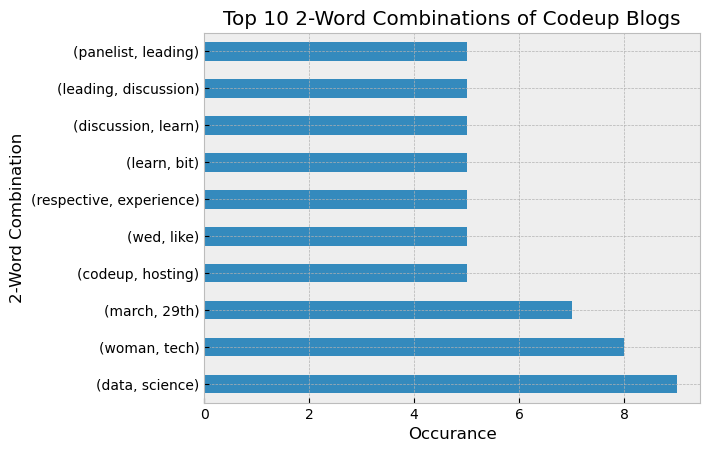

In [83]:
# Visualize distribution of top 10 2-Word Combinations 
bigram_words = pd.Series(nltk.bigrams(all_words.split()))
bigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 2-Word Combinations of Codeup Blogs')
plt.xlabel('Occurance')
plt.ylabel('2-Word Combination')
plt.show()

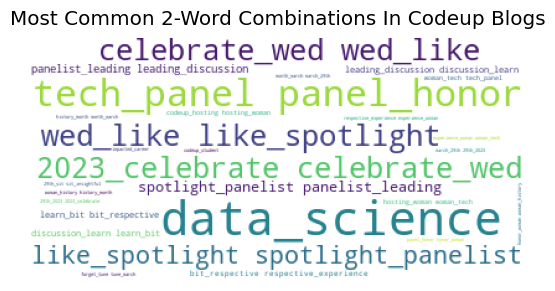

In [90]:
# Visualize wordcloud for 2-word combinations
bigram_words_combined = [bigram[0] + '_' + bigram[1] for bigram in bigram_words]
bigram_codeup_img = WordCloud(background_color='White').generate(' '.join(bigram_words_combined))
plt.imshow(bigram_codeup_img)
plt.axis('off')
plt.title('Most Common 2-Word Combinations In Codeup Blogs')
plt.show()

---

<a id='q2trigrams'></a>
<h3><b><i>
    Trigrams
</i></b></h3>
<li><a href='#q2'>Question 2 Top</a></li>

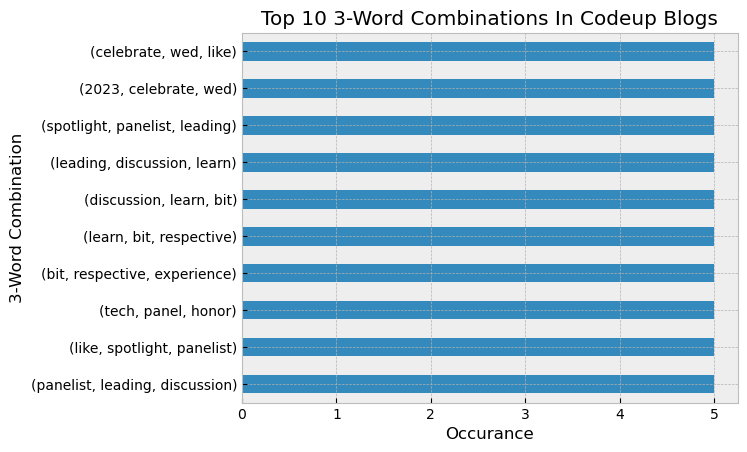

In [96]:
# Visualize the distribution of 3-word combinations
trigram_words = pd.Series(nltk.ngrams(all_words.split(), 3))
trigram_words.value_counts().head(10).plot.barh()
plt.title('Top 10 3-Word Combinations In Codeup Blogs')
plt.xlabel('Occurance')
plt.ylabel('3-Word Combination')
plt.show()

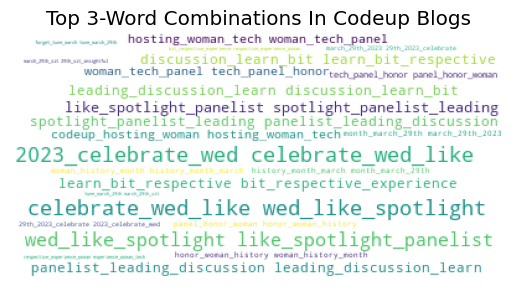

In [99]:
# Visualize wordcloud for 3-word combinations
trigram_words_combined = [trigram[0] + '_' + trigram[1] + '_' + trigram[2] for trigram in trigram_words]
trigram_codeup_img = WordCloud(background_color='White').generate(' '.join(trigram_words_combined))
plt.imshow(trigram_codeup_img)
plt.title('Top 3-Word Combinations In Codeup Blogs')
plt.axis('off')
plt.show()

---

<a id='q2takeaway'></a>
<h3><b><i>
    Takeaway
</i></b></h3>
<li><a href='#q2'>Question 2 Top</a></li>

- Single words tend to be the name of the person, school, or class
- Combinations of words seem to be fairly uniform distribution

<div style='background-color : orange'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align : center'>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#q3initial'>Initial Setup</a></li>
<li><a href='#q3wordcountcreation'>Word Count Creation</a></li>
<li><a href='#q3bigrams'>Bigrams</a></li>
<li><a href='#q3trigrams'>Trigrams</a></li>
<li><a href='#q3takeaway'>Takeaway</a></li>

<b>Question 3.</b> Explore the news articles using the techniques discussed in the exploration lesson. Use the <mark>category</mark> variable when exploring.

---

<a id='q3initial'></a>
<h3><b><i>
    Initial Setup
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

In [101]:
# Obtain the news data
news_df = p.prepare_news_articles()
news_df.sample()

category                                           headline  \
0  Business  Microsoft won't give salary hikes to full-time...   

                                             summary  \
0  Microsoft will not give salary hikes to full-t...   

                                      headline_clean  \
0  microsoft wont give salary hike fulltime emplo...   

                                       summary_clean  
0  microsoft give salary hike fulltime employee y...

In [102]:
# Split the data and stratify on category
train_validate, test = train_test_split(news_df,
                                       random_state=1349,
                                       train_size=0.9,
                                       stratify=news_df.category)
train, validate = train_test_split(train_validate,
                                  random_state=1349,
                                  train_size=0.778,
                                  stratify=train_validate.category)
train.shape, validate.shape, test.shape

((70, 5), (20, 5), (10, 5))

---

<a id='q3wordcountcreation'></a>
<h3><b><i>
    Word Count Creation
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

In [126]:
# Split words into groups
sports_words = ' '.join(train[train.category == 'Sports'].summary_clean)
business_words = ' '.join(train[train.category == 'Business'].summary_clean)
entertainment_words = ' '.join(train[train.category == 'Entertainment'].summary_clean)
technology_words = ' '.join(train[train.category == 'Technology'].summary_clean)
all_words = ' '.join(train.summary_clean)

In [129]:
# Get word frequencies of each group
sports_word_freq = pd.Series(sports_words.split()).value_counts()
business_word_freq = pd.Series(business_words.split()).value_counts()
entertainment_word_freq = pd.Series(entertainment_words.split()).value_counts()
technology_word_freq = pd.Series(technology_words.split()).value_counts()
all_word_freq = pd.Series(all_words.split()).value_counts()

In [134]:
# Create dataframe with all word frequencies
word_freq = (pd.concat([all_word_freq, sports_word_freq, business_word_freq, entertainment_word_freq, technology_word_freq], axis=1)
     .set_axis(['all', 'sport', 'business', 'entertainment', 'tech'], axis=1)
     .fillna(0)
     .apply(lambda col: col.astype(int)))
word_freq.sample()

all  sport  business  entertainment  tech
barcelona    3      3         0              0     0

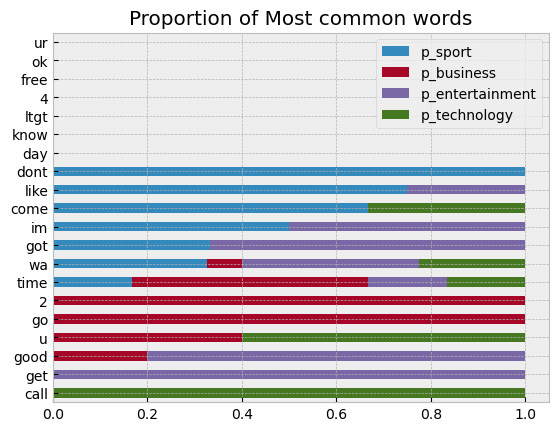

In [141]:
# Visualize word percentage of spam vs. ham
(word_counts
 .assign(p_sport=word_freq.sport / word_freq['all'],
         p_business=word_freq.business / word_freq['all'],
         p_entertainment=word_freq.entertainment / word_freq['all'],
         p_technology=word_freq.tech / word_freq['all'])
 .sort_values(by='all')
 [['p_sport', 'p_business', 'p_entertainment', 'p_technology']]
 .tail(20)
 .sort_values(by=['p_sport', 'p_business', 'p_entertainment', 'p_technology'])
 .plot.barh(stacked=True))

plt.title('Proportion of Most common words')
plt.show()

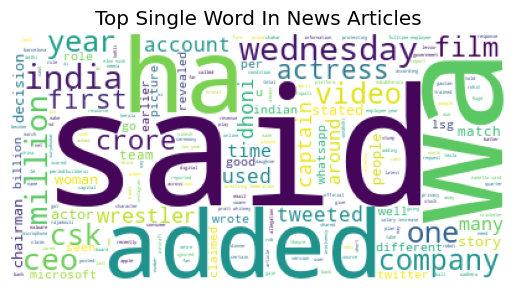

In [145]:
# Get wordclouds
unigram_news_img = WordCloud(background_color='White').generate(all_words)
plt.imshow(unigram_news_img)
plt.title('Top Single Word In News Articles')
plt.axis('off')
plt.show()

---

<a id='q3bigrams'></a>
<h3><b><i>
    Bigrams
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

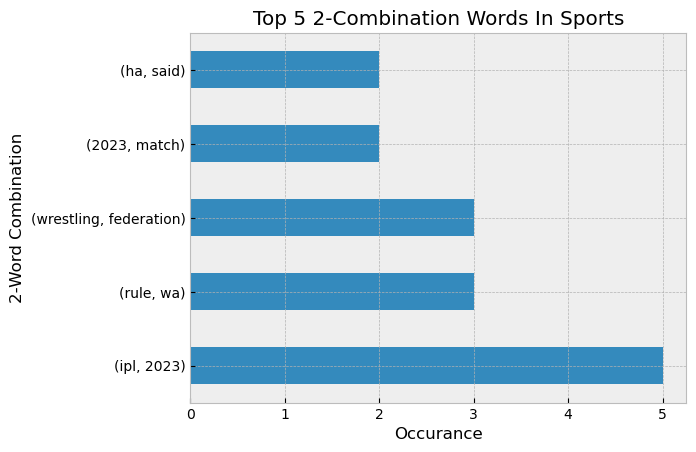

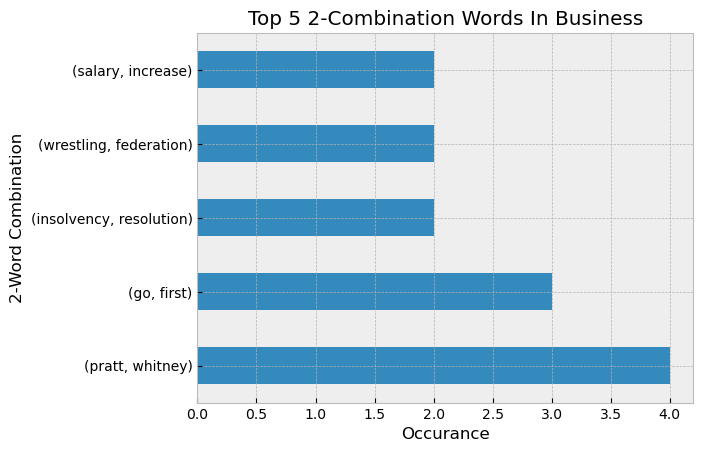

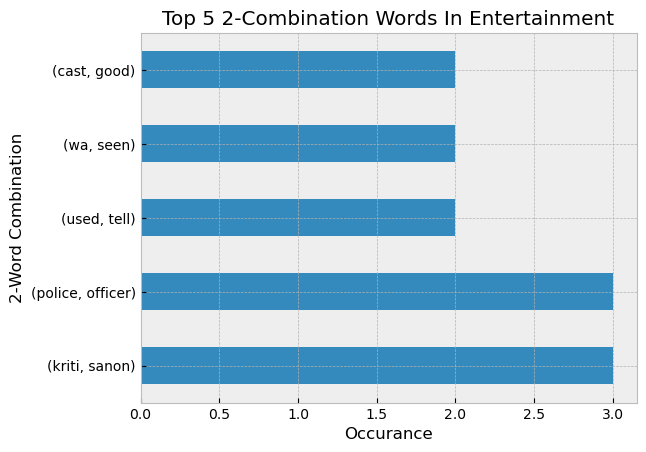

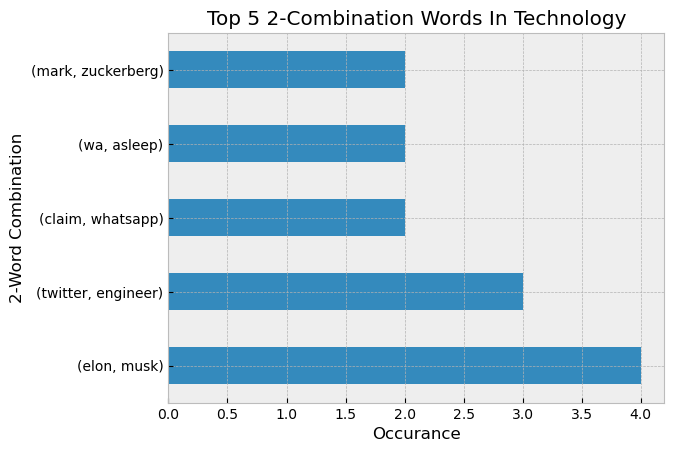

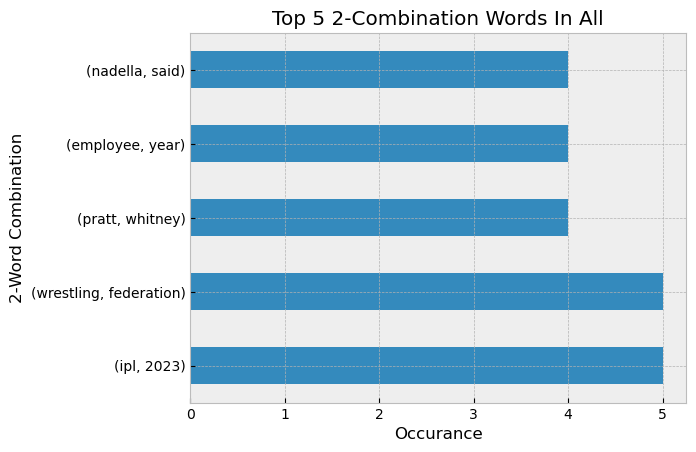

In [160]:
# Create bigrams of everything
sports_bigram = pd.Series(nltk.bigrams(sports_words.split()))
business_bigram = pd.Series(nltk.bigrams(business_words.split()))
entertainment_bigram = pd.Series(nltk.bigrams(entertainment_words.split()))
technology_bigram = pd.Series(nltk.bigrams(technology_words.split()))
all_bigram = pd.Series(nltk.bigrams(all_words.split()))
bigram_list = [
    sports_bigram,
    business_bigram,
    entertainment_bigram,
    technology_bigram,
    all_bigram
]
n = -1
for bigram in bigram_list:
    n += 1
    names = ['Sports', 'Business', 'Entertainment', 'Technology', 'All']
    bigram.value_counts().head(5).plot.barh()
    plt.title(f'Top 5 2-Combination Words In {names[n]}')
    plt.xlabel('Occurance')
    plt.ylabel('2-Word Combination')
    plt.show()

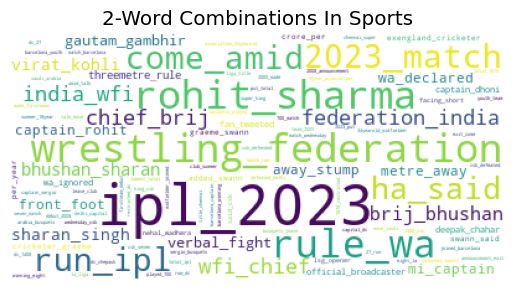

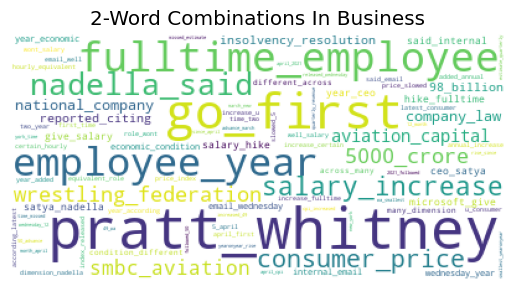

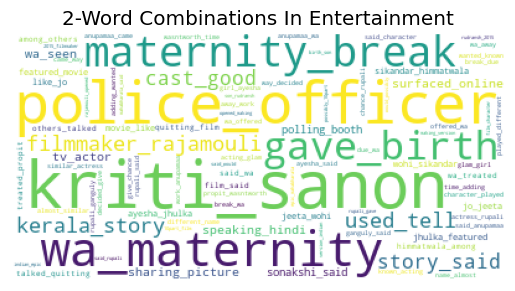

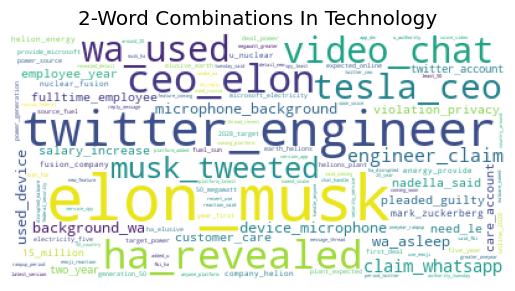

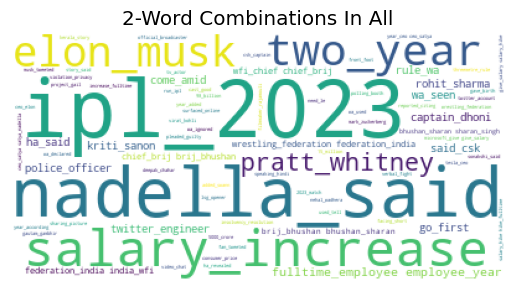

In [165]:
# Wordclouds of everything
n = -1
for bigram in bigram_list:
    n += 1
    names = ['Sports', 'Business', 'Entertainment', 'Technology', 'All']
    bigram_combined = [bi[0] + '_' + bi[1] for bi in bigram]
    img = WordCloud(background_color='White').generate(' '.join(bigram_combined))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'2-Word Combinations In {names[n]}')
    plt.show()

---

<a id='q3trigrams'></a>
<h3><b><i>
    Trigrams
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

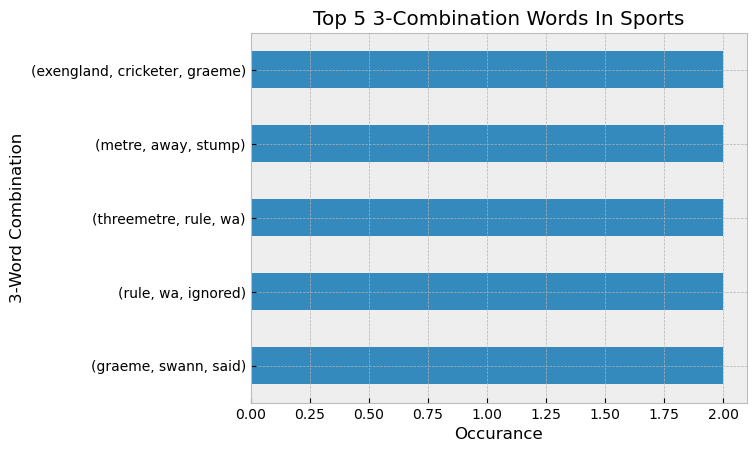

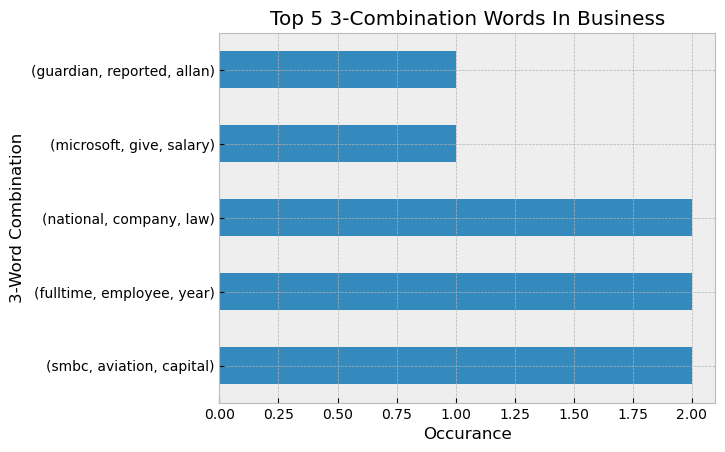

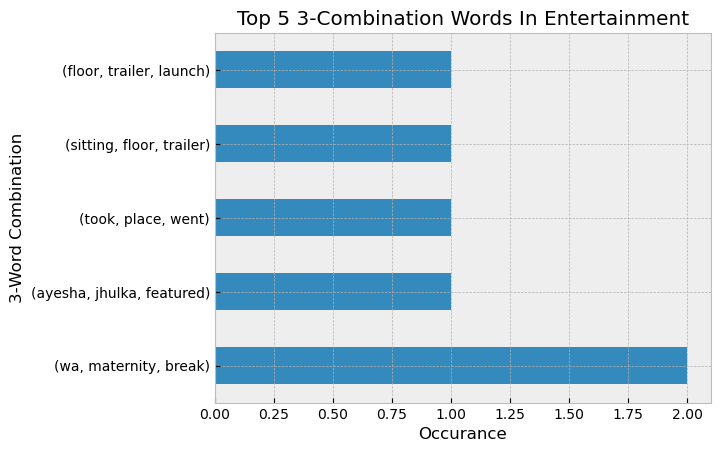

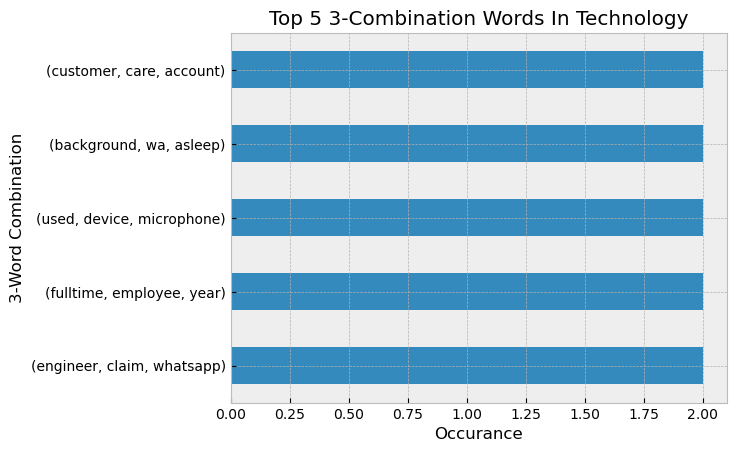

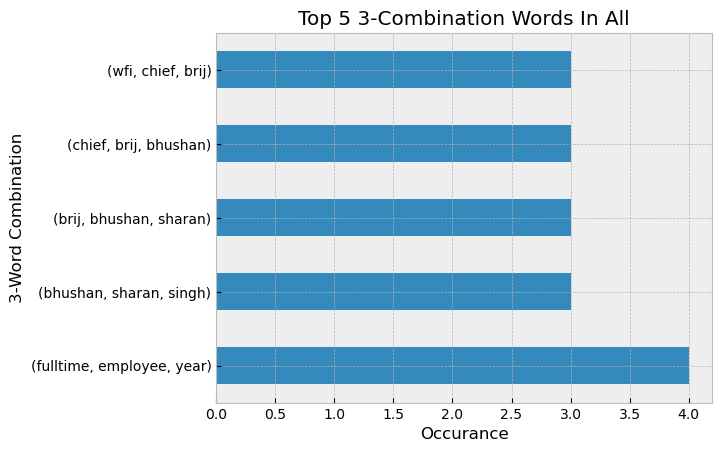

In [166]:
# Create trigrams of everything
sports_trigram = pd.Series(nltk.ngrams(sports_words.split(), 3))
business_trigram = pd.Series(nltk.ngrams(business_words.split(), 3))
entertainment_trigram = pd.Series(nltk.ngrams(entertainment_words.split(), 3))
technology_trigram = pd.Series(nltk.ngrams(technology_words.split(), 3))
all_trigram = pd.Series(nltk.ngrams(all_words.split(), 3))
trigram_list = [
    sports_trigram,
    business_trigram,
    entertainment_trigram,
    technology_trigram,
    all_trigram
]
n = -1
for trigram in trigram_list:
    n += 1
    names = ['Sports', 'Business', 'Entertainment', 'Technology', 'All']
    trigram.value_counts().head(5).plot.barh()
    plt.title(f'Top 5 3-Combination Words In {names[n]}')
    plt.xlabel('Occurance')
    plt.ylabel('3-Word Combination')
    plt.show()

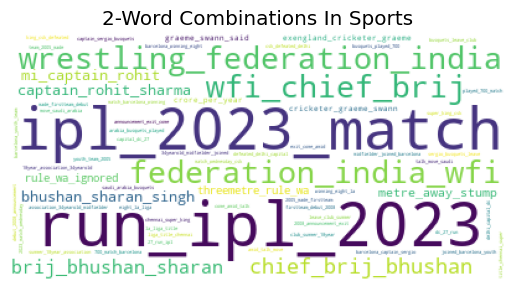

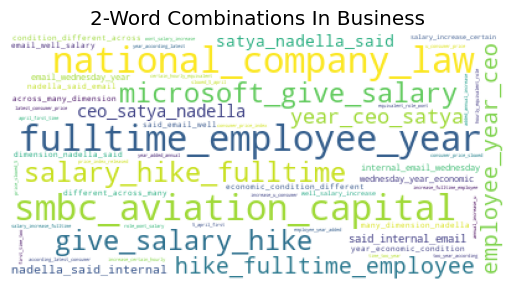

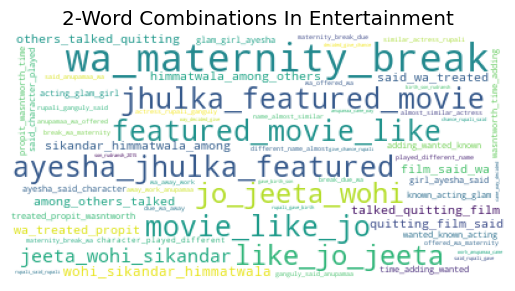

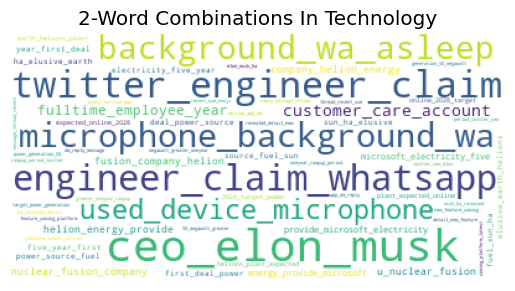

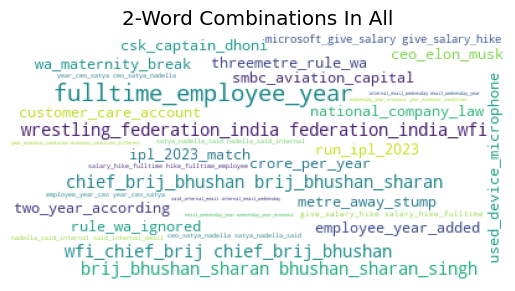

In [167]:
# Wordclouds of everything
n = -1
for trigram in trigram_list:
    n += 1
    names = ['Sports', 'Business', 'Entertainment', 'Technology', 'All']
    trigram_combined = [tri[0] + '_' + tri[1] + '_' + tri[2] for tri in trigram]
    img = WordCloud(background_color='White').generate(' '.join(trigram_combined))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'2-Word Combinations In {names[n]}')
    plt.show()

---

<a id='q3takeaway'></a>
<h3><b><i>
    Takeaway
</i></b></h3>
<li><a href='#q3'>Question 3 Top</a></li>

- The word choices seem to be consistent with what category the article is about
- words...

<div style='background-color : orange'>
<a id='misc'></a>
    <b><u><i><h1 style='text-align : center'>
        Miscellaneous
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>